# Time-series retail forecasting
I try to replicated this: https://shiring.github.io/forecasting/2017/05/28/retail_forcasting_part1 in Python to learn more about time series analysis. 

The data is from UCI or https://www.kaggle.com/carrie1/ecommerce-data

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

%matplotlib inline


In [2]:
df = pd.read_csv('data/OnlineRetail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Let's see the data size

In [3]:
df.shape

(541909, 8)

In [4]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Some weird value in Quantity and UnitPrice

In [5]:
print('Quantity lower than 0:',len(df[df['Quantity']<0]))
print('UnitPrice lower than 0:',len(df[df['UnitPrice']<0]))

Quantity lower than 0: 10624
UnitPrice lower than 0: 2


What is negative value on both of them mean?

How about the Country?

In [6]:
len(df['Country'].unique())

38

In [7]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

Is there any missing values?

In [8]:
for column in df.columns:
    print('%s NA: %.2f %%' % (column, df[column].isnull().sum()/df.shape[0]*100))

InvoiceNo NA: 0.00 %
StockCode NA: 0.00 %
Description NA: 0.27 %
Quantity NA: 0.00 %
InvoiceDate NA: 0.00 %
UnitPrice NA: 0.00 %
CustomerID NA: 24.93 %
Country NA: 0.00 %


About 25% of customers in the transaction doesn't have proper ID

Looking at the dataset, I think we can change the type to more proper one:
- CustomerID: float -> category
- InvoiceNo: object -> category
- StockCode: object -> category
- Country: object -> category
- InvoiceDate: sparse to timestamp or datetime

In [12]:
df['CustomerID'] = df['CustomerID'].astype('category')
df['InvoiceNo'] = df['InvoiceNo'].astype('category')
df['StockCode'] = df['StockCode'].astype('category')
df['Country'] = df['Country'].astype('category')

In [13]:
%time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs


In [14]:
df.dtypes

InvoiceNo            category
StockCode            category
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID           category
Country              category
dtype: object

In her blog, Shiring's adds some additional features. Here's mine

In [22]:
%time

df['Hour'] = df['InvoiceDate'].map(lambda x: x.hour)
df['DOW'] = df['InvoiceDate'].map(lambda x: x.day)
df['Month'] = df['InvoiceDate'].map(lambda x: x.month)
df['Income'] = df['Quantity'] * df['UnitPrice']
df['income_return'] = df['Income'].apply(lambda x: ('income' if x>=0 else 'return'))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.39 µs


http://matplotlib.org/users/gridspec.html#gridspec-and-subplotspec

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

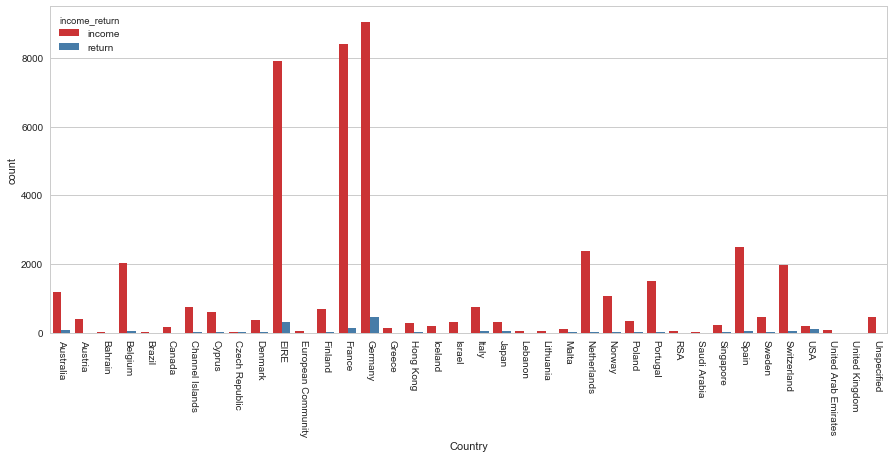

In [63]:
f, ax = plt.subplots(figsize=(15,6))

sns.countplot(data=df[df['Country'] != 'United Kingdom'],
            x='Country', hue='income_return', palette='Set1')
plt.xticks(rotation=-90)

## Time-series

Plotting the total number transaction both income and return over time.

In [64]:
ts = df.set_index('InvoiceDate', drop=True)

In [98]:
ts.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Hour,DOW,Month,Income,income_return
InvoiceDate,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,8,1,12,15.30,income
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,8,1,12,20.34,income
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,8,1,12,22.00,income
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,8,1,12,20.34,income
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,8,1,12,20.34,income


In [81]:
ts_daily = ts[['Income']].resample('d').sum()

In [82]:
ts_daily.head(12)

,Income
InvoiceDate,
2010-12-01,58635.56
2010-12-02,46207.28
2010-12-03,45620.46
2010-12-04,NaN
2010-12-05,31383.95
2010-12-06,53860.18
2010-12-07,45059.05
2010-12-08,44189.84
2010-12-09,52532.13


They didn't operate at weekend. What kind of online shop doesn't have transaction at the weekend?

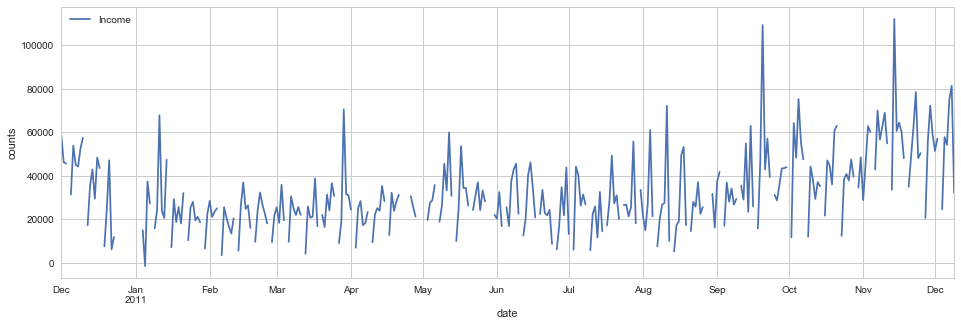

In [83]:
fig, ax = plt.subplots(figsize=(16,5))

ts_daily[['Income']].plot(ax=ax)
ax.set_xlabel('date')
ax.set_ylabel('counts')

Transaction by day and time

In [87]:
ts_hourly = ts[['Income']].resample('h').count()
ts_hourly=ts_hourly.rename(columns = {'Income':'count'})
ts_hourly.head()

,count
InvoiceDate,
2010-12-01 08:00:00,46
2010-12-01 09:00:00,151
2010-12-01 10:00:00,121
2010-12-01 11:00:00,370
2010-12-01 12:00:00,421


In [88]:
pivoted_hourly = ts_hourly[['count']].pivot_table(index=ts_hourly.index.date, 
                                                  columns = ts_hourly.index.hour)

In [89]:
pivoted_hourly.head()

count                                                  ...   \
InvoiceDate    0    1    2    3    4    5    6     7     8      9  ...    
2010-12-01    NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  46.0  151.0 ...    
2010-12-02    0.0  0.0  0.0  0.0  0.0  0.0  0.0  10.0  52.0   88.0 ...    
2010-12-03    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   42.0 ...    
2010-12-04    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0 ...    
2010-12-05    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0 ...    

                                                                           
InvoiceDate     14     15     16     17     18     19   20   21   22   23  
2010-12-01   735.0  189.0  160.0  647.0    0.0    0.0  0.0  0.0  0.0  0.0  
2010-12-02   226.0  339.0  150.0  113.0  123.0  105.0  0.0  0.0  0.0  0.0  
2010-12-03   397.0  164.0   76.0  105.0    0.0    0.0  0.0  0.0  0.0  0.0  
2010-12-04     0.0    0.0    0.0    0.0    0.0    0.0  0.0  0.0  0.0  0.0  
2010-12-05   251.0  338.0  268.0    0.0    0.0    0.0  0.0  0.0  0.0  0.0  

[5 rows x 24 columns]

In [91]:
pivoted_hourly.shape')

(374, 24)

To plot heatmap like the one Shiring have made, I gotta to resample  one more time into weekly since 374 in rows is to much. But there is a problem. The index after we resample and pivot is not DatetimeIndex anymore. Instead it is an ordinary index as follows

In [101]:
pivoted_hourly.index

Index([2010-12-01, 2010-12-02, 2010-12-03, 2010-12-04, 2010-12-05, 2010-12-06,
       2010-12-07, 2010-12-08, 2010-12-09, 2010-12-10,
       ...
       2011-11-30, 2011-12-01, 2011-12-02, 2011-12-03, 2011-12-04, 2011-12-05,
       2011-12-06, 2011-12-07, 2011-12-08, 2011-12-09],
      dtype='object', length=374)

The trick that i used here as follows: convert index by using to_datetime

In [124]:
pivoted_hourly_w = pivoted_hourly.copy()

In [125]:
pivoted_hourly_w.index = pd.to_datetime(pivoted_hourly_w.index)

In [126]:
pivoted_hourly_w.head()

count                                                  ...   \
InvoiceDate    0    1    2    3    4    5    6     7     8      9  ...    
2010-12-01    NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  46.0  151.0 ...    
2010-12-02    0.0  0.0  0.0  0.0  0.0  0.0  0.0  10.0  52.0   88.0 ...    
2010-12-03    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   42.0 ...    
2010-12-04    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0 ...    
2010-12-05    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0 ...    

                                                                           
InvoiceDate     14     15     16     17     18     19   20   21   22   23  
2010-12-01   735.0  189.0  160.0  647.0    0.0    0.0  0.0  0.0  0.0  0.0  
2010-12-02   226.0  339.0  150.0  113.0  123.0  105.0  0.0  0.0  0.0  0.0  
2010-12-03   397.0  164.0   76.0  105.0    0.0    0.0  0.0  0.0  0.0  0.0  
2010-12-04     0.0    0.0    0.0    0.0    0.0    0.0  0.0  0.0  0.0  0.0  
2010-12-05   251.0  338.0  268.0    0.0    0.0    0.0  0.0  0.0  0.0  0.0  

[5 rows x 24 columns]

In [127]:
pivoted_hourly_w.index

DatetimeIndex(['2010-12-01', '2010-12-02', '2010-12-03', '2010-12-04',
               '2010-12-05', '2010-12-06', '2010-12-07', '2010-12-08',
               '2010-12-09', '2010-12-10',
               ...
               '2011-11-30', '2011-12-01', '2011-12-02', '2011-12-03',
               '2011-12-04', '2011-12-05', '2011-12-06', '2011-12-07',
               '2011-12-08', '2011-12-09'],
              dtype='datetime64[ns]', length=374, freq=None)

After the index become DatetimeIndex, we can use resample to resample it weekly

In [128]:
pivoted_hourly_w = pivoted_hourly_w.resample('w').sum()
pivoted_hourly_w.head()

count                                                   ...   \
InvoiceDate    0    1    2    3    4    5    6     7     8       9  ...    
2010-12-05    0.0  0.0  0.0  0.0  0.0  0.0  0.0  10.0  98.0   281.0 ...    
2010-12-12    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  53.0  1502.0 ...    
2010-12-19    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  57.0   839.0 ...    
2010-12-26    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   4.0   118.0 ...    
2011-01-02    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0     0.0 ...    

                                                                               
InvoiceDate      14      15      16     17     18     19    20   21   22   23  
2010-12-05   1609.0  1030.0   654.0  865.0  123.0  105.0   0.0  0.0  0.0  0.0  
2010-12-12   3136.0  2410.0  1662.0  189.0  585.0   68.0  65.0  0.0  0.0  0.0  
2010-12-19   2402.0  1348.0   915.0  871.0   49.0  207.0   0.0  0.0  0.0  0.0  
2010-12-26    381.0  1371.0   281.0   96.0    0.0    0.0   0.0  0.0  0.0  0.0  
2011-01-02      0.0     0.0     0.0    0.0    0.0    0.0   0.0  0.0  0.0  0.0  

[5 rows x 24 columns]

In [129]:
pivoted_hourly_w.shape

(54, 24)

The size of rows become more manageable to plot using heatmap

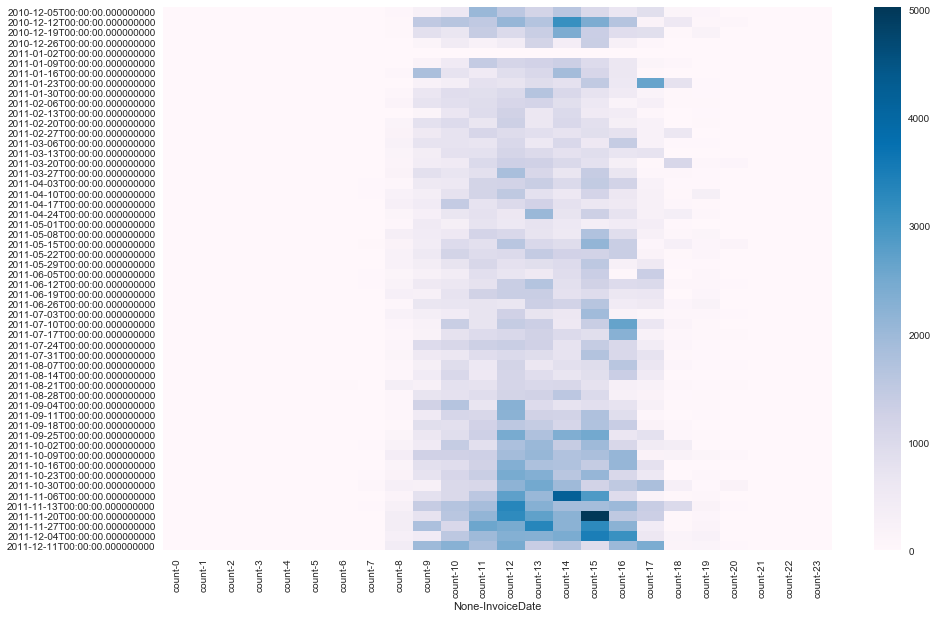

In [140]:
plt.figure(figsize=(15,10))
sns.heatmap(pivoted_hourly_w, cmap='PuBu')

I know the label is still really bad. I don't know yet how to make it better. I think I should learn more about plt xticks and yticks

## Items

In [141]:
len(df['StockCode'].unique())

4070

In [142]:
len(df['Description'].unique())

4224

Some items has different description

## By transaction

the feature `InvoiceNo` identified the number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation

In [143]:
len(df['InvoiceNo'].unique())

25900

So out of those 500k data, we actually only has 25k transaction. And among those 25k there is some order that is cancelled too.

In [174]:
import re

In [170]:
all_IN = df['InvoiceNo'].unique()
all_canceledIN = []
for IN in all_IN:
    if re.match('C',IN):
        all_canceledIN.append(IN)

In [173]:
len(all_canceledIN)

3836

So there are about 3.8k canceled order. It can be good that rather than stay in as C in the InvoiceNo, we can make new column that state this transaction is canceled.

In [175]:
df['cancelled'] = df['InvoiceNo'].map(lambda x: (1 if re.match('C', x) else 0))

In [180]:
len(df['InvoiceNo'][df['cancelled'] == 1].unique())

3836

## Costumers

In [145]:
len(df['CustomerID'].unique())

4373

In [185]:
len(df['CustomerID'].value_counts())

4372

So there are only 4.3k unique customers in the whole transaction. Shirin analyse about how many of them do order more than one time, without counting the NaN. Unfortunately NaN automatically count as unique Id when we use `.unique()`. But we can use value_counts() tho

In [209]:
df_customer = pd.DataFrame(df['CustomerID'].value_counts())
df_customer = df_customer.rename(columns={'CustomerID':'count'})
df_customer['reorder'] = df_customer['count'].map(lambda x: (1 if x>1 else 0))

In [210]:
df_customer.head()

,count,reorder
17841.0,7983,1
14911.0,5903,1
14096.0,5128,1
12748.0,4642,1
14606.0,2782,1


In [211]:
df_customer['reorder'].value_counts()

1    4293
0      79
Name: reorder, dtype: int64

Do you think this is right? NO!!! I did wrong thing. The count is not what it mean to be since it derived from df. First I have to group them by unique InvoiceNo since it identify unique transaction. Then I can use first() as aggregate function since I think one transaction must be done by one customer.

In [212]:
df_trans = df.groupby('InvoiceNo')[['CustomerID']].first()

In [213]:
df_trans.head()

,CustomerID
InvoiceNo,
536365,17850.0
536366,17850.0
536367,13047.0
536368,13047.0
536369,13047.0


Nice, we can now do value_counts on this customerID

In [214]:
df_customer_trans_count = pd.DataFrame(df_trans['CustomerID'].value_counts())
df_customer_trans_count = df_customer_trans_count.rename(columns={'CustomerID':'count'})
df_customer_trans_count['reorder'] = df_customer_trans_count['count'].map(lambda x: (1 if x>1 else 0))
df_customer_trans_count.head()

,count,reorder
14911.0,248,1
12748.0,224,1
17841.0,169,1
14606.0,128,1
13089.0,118,1


In [215]:
df_customer_trans_count['reorder'].value_counts()

1    3059
0    1313
Name: reorder, dtype: int64

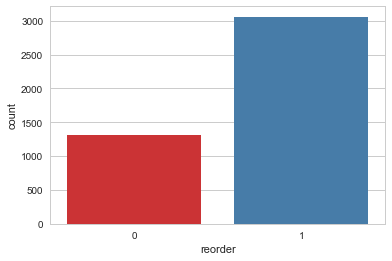

In [224]:
sns.countplot(data=df_customer_trans_count, x='reorder', palette='Set1')

# Back to Time-Series

I going to learn to make several time series metrics:
- Income daily (done)
- Number of different item daily
- Number of different customer daily
- Number of different transaction daily
- Number of different country daily

Should I makes new data frame for each? Well dude turns out making metrics like this is not as simple as it seems. __Today I'm sad, I got rejection email from startup, my confidence is drop__ But gotta keep learning and trying right? FUck yeah.

OK let's examine our original dataFrame one more time since it has been burried above

In [226]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,DOW,Month,Income,income_return,cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,1,12,15.30,income,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,1,12,20.34,income,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,1,12,22.00,income,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,1,12,20.34,income,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,1,12,20.34,income,0


If I want to make times series, of course InvoiceDate sould be the index. We already done that

In [261]:
ts = df.set_index('InvoiceDate')
ts.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Hour,DOW,Month,Income,income_return,cancelled
InvoiceDate,,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,8,1,12,15.30,income,0
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,8,1,12,20.34,income,0
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,8,1,12,22.00,income,0
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,8,1,12,20.34,income,0
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,8,1,12,20.34,income,0


If we want to look at how much different transaction in daily manner, that means i have to count how much unique `InvoiceNo` value for each day. I have never done this before. I google: pandas resample count unique

https://stackoverflow.com/questions/23208368/pandas-count-unique-values-after-resample

From that stackoverflow answer, I found that we can use `.nunique()` as the aggregate function

In [262]:
ts_ctrans = ts.groupby(ts.index.date)['InvoiceNo'].nunique()
ts_ctrans.head()

2010-12-01    143
2010-12-02    167
2010-12-03    108
2010-12-05     95
2010-12-06    133
Name: InvoiceNo, dtype: int64

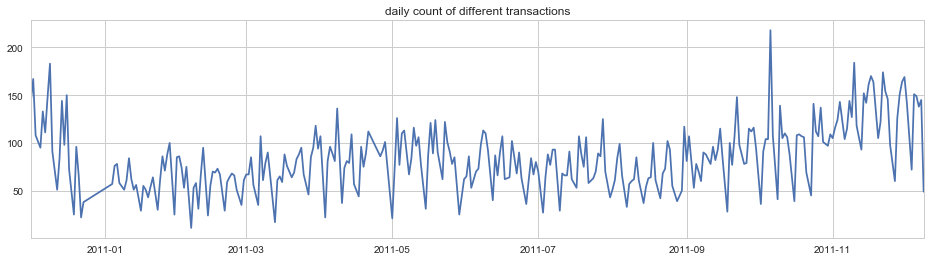

In [263]:
ts_ctrans.plot(figsize=(16,4))
plt.title('daily count of different transactions')

Cool!!!!

So for the number of different item, we can do

In [264]:
ts_citems = ts.groupby(ts.index.date)['StockCode'].nunique()
ts_citems.head()

2010-12-01    1351
2010-12-02     934
2010-12-03    1156
2010-12-05    1151
2010-12-06    1479
Name: StockCode, dtype: int64

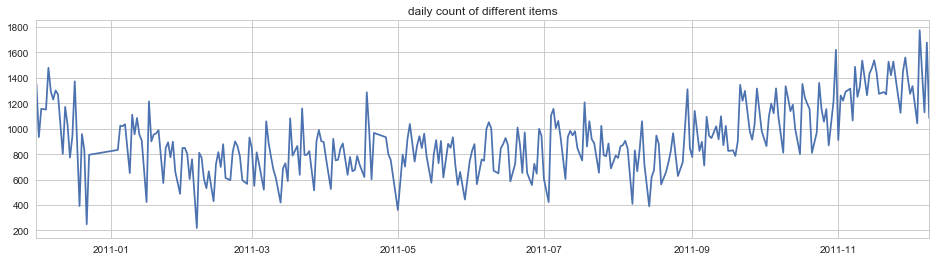

In [265]:
ts_citems.plot(figsize=(16,4))
plt.title('daily count of different items')

Great!

Then number of different customer daily, we can do

In [266]:
ts_ccust = ts.groupby(ts.index.date)['CustomerID'].nunique()
ts_ccust.head()

2010-12-01     98
2010-12-02    117
2010-12-03     55
2010-12-05     76
2010-12-06     90
Name: CustomerID, dtype: int64

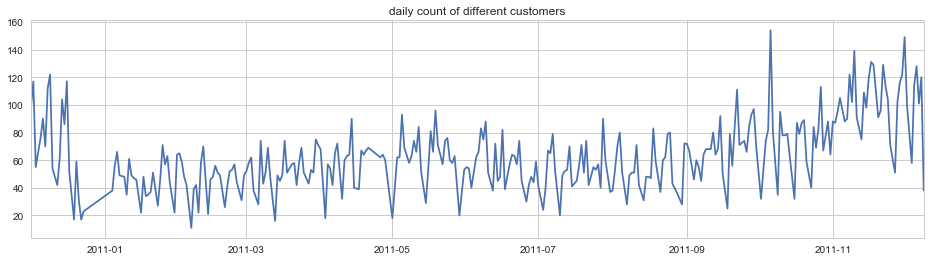

In [267]:
ts_ccust.plot(figsize=(16,4))
plt.title('daily count of different customers')

In [268]:
ts_ccountry = ts.groupby(ts.index.date)['Country'].nunique()
ts_ccountry.head()

2010-12-01     7
2010-12-02     3
2010-12-03    10
2010-12-05     5
2010-12-06     5
Name: Country, dtype: int64

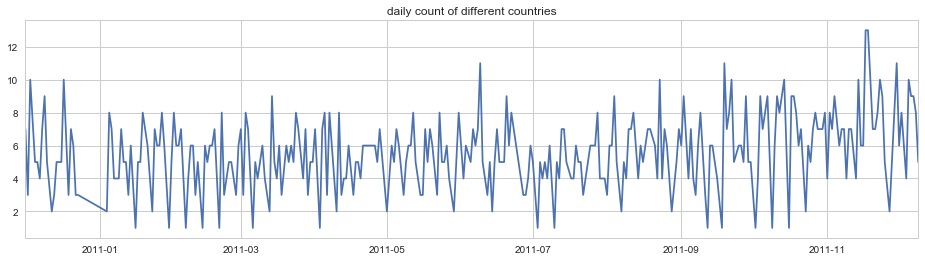

In [269]:
ts_ccountry.plot(figsize=(16,4))
plt.title('daily count of different countries')

Let's plot daily count of different customer and different transaction together

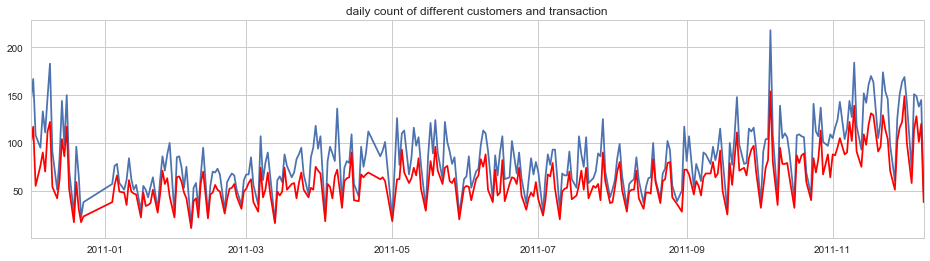

In [248]:
ts_ctrans.plot(figsize=(16,4))
ts_ccust.plot(figsize=(16,4), c='r')
plt.title('daily count of different customers and transaction')

I think this graph is make sense, count of different customer always lower than the count of different transaction. There is always some customer that order more that once in one day. What if someday you find the opposite. Count of customer higher than count of different transaction. That means there is some transaction that doesn't have customer.

Cool but actually we can make them together in one dataFrame right? 

All is count of unique

In [252]:
ts_unique = ts.groupby(ts.index.date)['CustomerID', 'InvoiceNo', 'StockCode', 'Country'].nunique()
ts_unique.head()

,CustomerID,InvoiceNo,StockCode,Country
2010-12-01,98,143,1351,7
2010-12-02,117,167,934,3
2010-12-03,55,108,1156,10
2010-12-05,76,95,1151,5
2010-12-06,90,133,1479,5


What if you want to use different aggreate function, like for example the above use unique but I need the mean and the sum for `Quantity` and `Income`

I see here: https://pandas.pydata.org/pandas-docs/stable/groupby.html

In [260]:
ts_agg = ts.groupby(ts.index.date).agg({'Income':'sum', 
                                        'Quantity':'mean', 
                                        'StockCode':'nunique',
                                        'InvoiceNo':'nunique', 
                                        'CustomerID':'nunique',
                                        'Country':'nunique'})
ts_agg.head()

,CustomerID,InvoiceNo,Quantity,StockCode,Income,Country
2010-12-01,98,143,8.627413,1351,58635.56,7
2010-12-02,117,167,9.968231,934,46207.28,3
2010-12-03,55,108,6.734787,1156,45620.46,10
2010-12-05,76,95,6.016514,1151,31383.95,5
2010-12-06,90,133,5.523208,1479,53860.18,5


Nice, I learn a lot! But as always, I will later forget this shits and have to google #alloveragain

How about number of cancelled order in daily manner? Don't use unique, use sum!

In [272]:
ts_ccancel = ts.groupby(ts.index.date)['cancelled'].sum()
ts_ccancel.head()

2010-12-01    26
2010-12-02    44
2010-12-03    14
2010-12-05    16
2010-12-06    49
Name: cancelled, dtype: int64

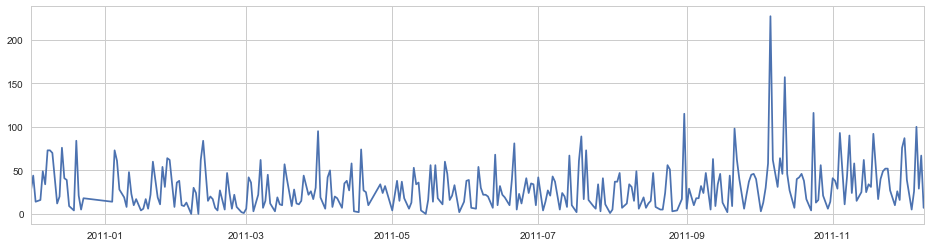

In [273]:
ts_ccancel.plot(figsize=(16,4))

This is somehow wrong tho, because it is not unique per transaction. I mean the cancel count double counted since when a transaction is cancelled, the whole item in the "cart" were cancelled.

AHH.. I geit it

In [281]:
ts_cancelled = ts[ts['cancelled']==1]
ts_cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Hour,DOW,Month,Income,income_return,cancelled
InvoiceDate,,,,,,,,,,,,,
2010-12-01 09:41:00,C536379,D,Discount,-1,27.50,14527.0,United Kingdom,9,1,12,-27.50,return,1
2010-12-01 09:49:00,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,9,1,12,-4.65,return,1
2010-12-01 10:24:00,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,10,1,12,-19.80,return,1
2010-12-01 10:24:00,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,10,1,12,-6.96,return,1
2010-12-01 10:24:00,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,10,1,12,-6.96,return,1


Wait, I found something, the negative value in Quantity turns out just because it is cancelled transaction! But later I will come back to analyse that.

using `ts_cancelled` I can just groupby and aggregate by `InvoiceNo` with `nunique()` function

In [283]:
ts_cancelled_in = ts_cancelled.groupby(ts_cancelled.index.date)['InvoiceNo'].nunique()
ts_cancelled_in.head()

2010-12-01     6
2010-12-02    23
2010-12-03     7
2010-12-05     7
2010-12-06    18
Name: InvoiceNo, dtype: int64

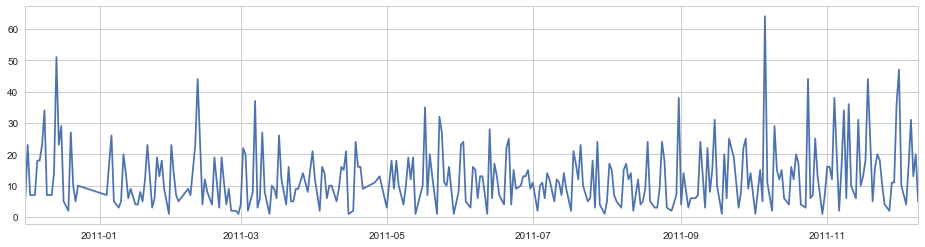

In [284]:
ts_cancelled_in.plot(figsize=(16,4))

Is this cancelled order graph correlated with the total transaction in daily manner?

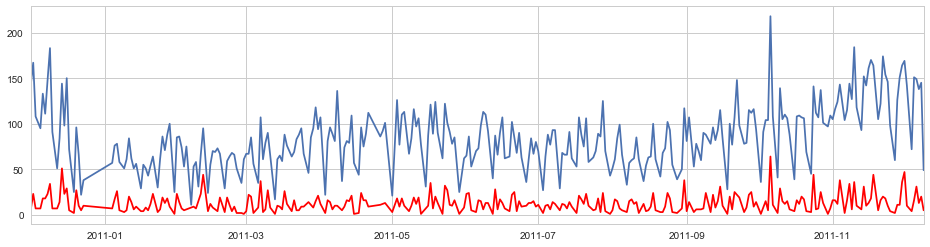

In [287]:
ts_ctrans.plot(figsize=(16,4))
ts_cancelled_in.plot(figsize=(16,4), c='r')

I think it's correlated. But I need a better way to represent it. The scale of those two is different. We can normalize, but how? Let's just try to devide the the sum of column

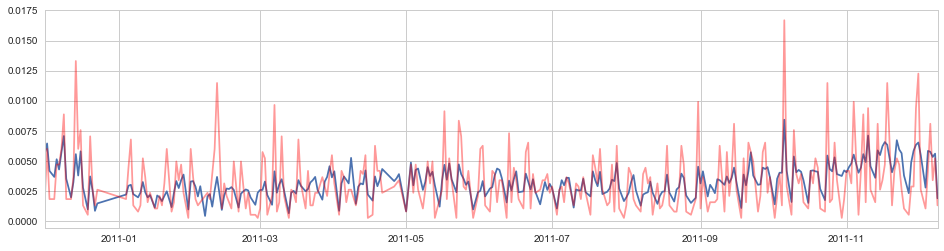

In [310]:
pd.Series(ts_ctrans/ts_ctrans.sum()).plot(figsize=(16,4))
pd.Series(ts_cancelled_in/ts_cancelled_in.sum()).plot(figsize=(16,4), c='r', alpha=0.4)

It is correlated in daily basis preriodicity. The high and low is sometimes correlated sometimes not. The cancelled order is more flat.